In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
path = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'
datapath = '/content/drive/MyDrive/covid-chestxray-dataset/images'
metafile = '/content/drive/MyDrive/covid-chestxray-dataset/metadata.csv'
print(os.path.exists(datapath))

True


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
metadata = pd.read_csv(metafile)

In [ ]:
finding_arr = metadata["finding"].to_numpy()
print(np.unique(finding_arr, return_counts=True))

view_arr = metadata['view'].to_numpy()
print(np.unique(view_arr, return_counts=True))

(array(['No Finding', 'Pneumonia', 'Pneumonia/Aspiration',
       'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Chlamydophila',
       'Pneumonia/Bacterial/E.Coli', 'Pneumonia/Bacterial/Klebsiella',
       'Pneumonia/Bacterial/Legionella', 'Pneumonia/Bacterial/Mycoplasma',
       'Pneumonia/Bacterial/Nocardia',
       'Pneumonia/Bacterial/Staphylococcus/MRSA',
       'Pneumonia/Bacterial/Streptococcus',
       'Pneumonia/Fungal/Aspergillosis', 'Pneumonia/Fungal/Pneumocystis',
       'Pneumonia/Lipoid', 'Pneumonia/Viral/COVID-19',
       'Pneumonia/Viral/Herpes ', 'Pneumonia/Viral/Influenza',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Viral/MERS-CoV',
       'Pneumonia/Viral/SARS', 'Pneumonia/Viral/Varicella',
       'Tuberculosis', 'Unknown', 'todo'], dtype=object), array([ 22,  81,   1,   4,   3,   4,  10,  10,  11,   8,   1,  22,   2,
        30,  13, 584,   3,   5,   2,  10,  16,   6,  18,   1,  83]))
(array(['AP', 'AP Erect', 'AP Supine', 'Axial', 'Coronal', 'L', 'PA'],
    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
virus = "Pneumonia/Viral/COVID-19" # Virus to look for
x_ray_view = "PA" # View of X-Ray

In [ ]:
covid_paths = []
for (i, row) in metadata.iterrows():
    if row["finding"] == virus and row['view'] == x_ray_view:
        # continue
        filename = row["filename"].split(os.path.sep)[-1]
        filepath = os.path.sep.join([datapath, filename])
        covid_paths.append(filepath)
print(len(covid_paths))

196


In [ ]:
non_covid_paths = []
for (i, row) in metadata.iterrows():
    if row["finding"] != virus and row['view'] == x_ray_view:
        filename = row["filename"].split(os.path.sep)[-1]
        filepath = os.path.sep.join([datapath, filename])
        non_covid_paths.append(filepath)
print(len(non_covid_paths))

148


In [ ]:
datapaths = covid_paths + non_covid_paths
print(len(datapaths))

344


In [ ]:
# from PIL import Image
# image = Image.open(datapaths[300])
# print(image.getbands())

In [ ]:
print(os.path.exists(datapaths[300]))

True


In [ ]:
import cv2
from PIL import Image

In [ ]:
def get_images_and_labels(path, label):
    n = len(path)
    images = []
    labels = []

    for i in range(1, n):
        # image = cv2.imread(path[i])
        # image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        # image = Image.fromarray(image)
        image = Image.open(path[i]).convert("RGB")
        images.append(image)
        labels.append(label)

    # images = np.array(images, dtype=object)
    # labels = np.array(labels, dtype=object)

    return images, labels

In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cimages, clabels = get_images_and_labels(covid_paths, "COVID")
ncimages, nclabels = get_images_and_labels(non_covid_paths, "Non-COVID")

In [ ]:
images = cimages + ncimages
labels = clabels + nclabels

In [ ]:
print(len(images))
print(len(labels))

342
342


In [ ]:
import tensorflow as tf

In [ ]:
#if set_memory_growth is enabled, the runtime initialization will not allocate all memory on the device. 
#Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
# import  matplotlib.pyplot as plt
# import numpy as np
# image_path = all_image_path[700]
# print(image_path)
# image = tf.io.read_file(image_path)
# read_image = tf.image.decode_jpeg(image, channels=3)
# # pil_image = Image.open(image_path)
# read_image = np.asarray(read_image)
# plt.figure(figsize=(20, 4))
# plt.imshow(read_image)
# plt.show()

In [ ]:
# print(read_image.shape)
# (_, _, _) = plt.hist(read_image.ravel(), bins=32, density=True)

In [ ]:
# image = tf.convert_to_tensor(read_image, dtype=tf.float32)
# print(image.shape)
# print(type(image))
# np_image = np.asarray(image)
# (_, _,_) = plt.hist(np_image.ravel(), bins=32, density=True)

In [ ]:
print(type(images))
print(type(labels))

<class 'list'>
<class 'list'>


In [ ]:
print(len(images))
print(len(labels))

342
342


In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
print(np.unique(labels, return_counts=True))

(array(['COVID', 'Non-COVID'], dtype='<U9'), array([195, 147]))


In [ ]:
from sklearn.model_selection import train_test_split
 
X_train_original, X_test_original, y_train, y_test = train_test_split(
    images, 
    labels, 
    test_size=100, 
    shuffle=True,
    random_state=42,
    stratify=labels
)

print(X_train_original.shape)
print(y_train.shape)
print(X_test_original.shape)
print(y_test.shape)

(242,)
(242,)
(100,)
(100,)


In [ ]:
# X_train_original, X_valid_original, y_train, y_valid = train_test_split(
#     X_train_original, 
#     y_train, 
#     test_size=70, 
#     shuffle=True,
#     random_state=42,
#     stratify=y_train
# )


# print(X_train_original.shape)
# print(y_train.shape)
# print(X_test_original.shape)
# print(y_test.shape)
# print(X_valid_original.shape)
# print(y_valid.shape)

In [ ]:
print(np.unique(y_train, return_counts=True))
# print(np.unique(y_valid, return_counts=True))
print(np.unique(y_test, return_counts=True)) 

(array(['COVID', 'Non-COVID'], dtype='<U9'), array([138, 104]))
(array(['COVID', 'Non-COVID'], dtype='<U9'), array([57, 43]))


In [ ]:
import torchvision.transforms as transforms
# transforms using pytorch api
train_transformer1 = transforms.Compose([
                        transforms.Resize(256),
                        transforms.RandomResizedCrop((224)),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor()
])

train_transformer2 = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

train_transformer3 = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop((224)),
    transforms.RandomRotation(5),
    transforms.ToTensor()
])

test_transformer = transforms.Compose([
                        transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor()
])

valid_transformer = transforms.Compose([
                        transforms.Resize((224, 224)),
                        # transforms.CenterCrop(224),
                        transforms.ToTensor()
])



In [ ]:
import tensorflow as tf

In [ ]:
def transforms_on_image(tf_image, transformation):
    np_image = np.asarray(tf_image)
    pil_image = Image.fromarray(np_image, mode='RGB')
    # print(type(pil_image))
    # print(pil_image.size)
    # assert len(pil_image.getbands()) == 3, "something wrong with the input image, may be not 3 dimensional" 


    torch_image = transformation(pil_image)
    torch_image = torch_image.permute(1, 2, 0)

    augmented_image = np.asarray(torch_image)
    augmented_image = tf.convert_to_tensor(augmented_image, dtype=tf.float32)
    return augmented_image
def transform_set(images, transformation):
    aug_images = []
    for i in range(0, len(images)):
        image = transforms_on_image(images[i], transformation)
        aug_images.append(image)
    
    aug_images = np.array(aug_images)
    return aug_images

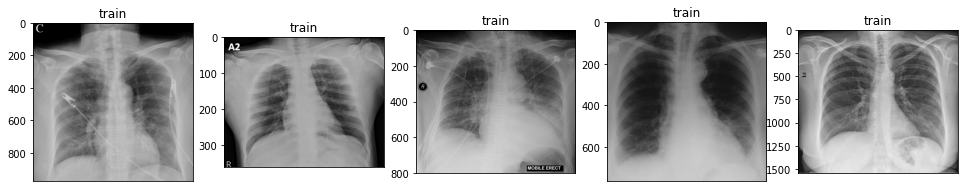

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n=6
for i in range(1, n):
    ax1 = plt.subplot(1, n, i)
    plt.imshow(X_train_original[i], cmap='gray')
    ax1.title.set_text("train")
    ax1.set_xticks([])

plt.show()

In [ ]:
X_train1 = transform_set(X_train_original, train_transformer1)
print(X_train1.shape)

X_train2 = transform_set(X_train_original, train_transformer2)
print(X_train2.shape)
X_train3 = transform_set(X_train_original, train_transformer3)
print(X_train3.shape)

(242, 224, 224, 3)
(242, 224, 224, 3)
(242, 224, 224, 3)


In [ ]:
X_test = transform_set(X_test_original, test_transformer)
print(X_test.shape)

# X_valid = transform_set(X_valid_original, test_transformer)
# print(X_valid.shape)

X_test_original = transform_set(X_test_original, valid_transformer)
print(X_test_original.shape)

# X_valid_original = transform_set(X_valid_original, valid_transformer)
# print(X_valid_original.shape)

(100, 224, 224, 3)
(100, 224, 224, 3)


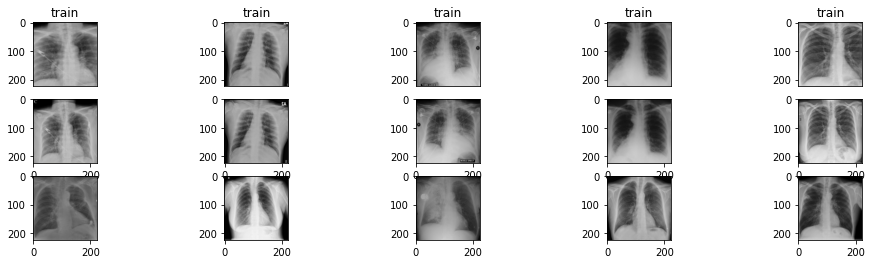

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n=6
for i in range(1, n):
    ax1 = plt.subplot(3, n, i)
    plt.imshow(X_train1[i])
    ax1.title.set_text("train")
    ax1.set_xticks([])

    ax2 = plt.subplot(3, n, i+n)
    plt.imshow(X_train2[i])

    ax3 = plt.subplot(3, n, i+n+n)
    plt.imshow(X_test_original[i])
plt.show()

In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# prepare target

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train_enc, 2)
y_test_cat = to_categorical(y_test_enc, 2)

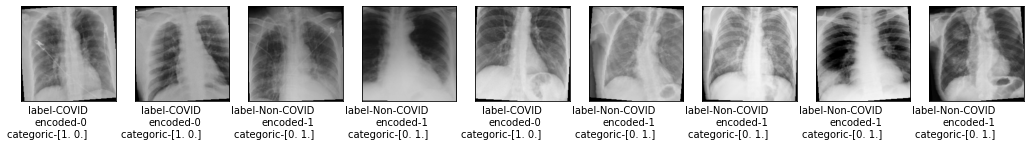

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train3[i])
    ax.text(0.7, -0.4, "label-{0}\nencoded-{1}\ncategoric-{2}".format(y_train[i], y_train_enc[i], y_train_cat[i]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, fontsize=10)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# converting the data to tf.tensor
X_train1 = tf.convert_to_tensor(X_train1)
X_train2 = tf.convert_to_tensor(X_train2)
X_train3 = tf.convert_to_tensor(X_train3)
X_test = tf.convert_to_tensor(X_test)
X_test_original = tf.convert_to_tensor(X_test_original)

# X_valid = tf.convert_to_tensor(X_valid)
# X_valid_original = tf.convert_to_tensor(X_valid_original)

y_train_enc = tf.convert_to_tensor(y_train_enc)
y_test_enc = tf.convert_to_tensor(y_test_enc)
# y_valid_enc = tf.convert_to_tensor(y_valid_enc)

y_train_cat = tf.convert_to_tensor(y_train_cat)
y_test_cat = tf.convert_to_tensor(y_test_cat)
# y_valid_cat = tf.convert_to_tensor(y_valid_cat)

In [ ]:
X_train = tf.concat([X_train1, X_train2, X_train3], 0)
Y_train_cat = tf.concat([y_train_cat, y_train_cat, y_train_cat], 0)
print(X_train.shape)
print(Y_train_cat.shape)

X_test_all = tf.concat([X_test, X_test_original], 0)
y_test_cat_all = tf.concat([y_test_cat, y_test_cat], 0)

print(X_test_all.shape)
print(y_test_cat_all.shape)

(726, 224, 224, 3)
(726, 2)
(200, 224, 224, 3)
(200, 2)


Plotting implementation

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    # val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    # val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    # plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    # plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training  loss')
    plt.legend()
    plt.show()

Model Implementation

Loading vgg19 and adding layers

In [ ]:
vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3))
# vgg_model.summary()
vgg_model.trainable=False 

x = vgg_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(500, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
vgg_output = tf.keras.layers.Dense(2, activation='softmax')(x)

vgg = tf.keras.models.Model(vgg_model.input, vgg_output)
vgg._name='vgg19'
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_checkpoint_path = path + '/models/test2/vgg-output1'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='loss',
                                                    mode='min',
                                                    save_best_only=False,
                                                    save_freq = 230)
# model_earlystopping_callback = tf.keras.callbacks.EarlyStopping(
#                                                     monitor='val_loss',
#                                                     patience = 5,
#                                                     mode='min')

In [ ]:
vgg.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

vgg_history = vgg.fit(X_train, Y_train_cat,
                    epochs=100,
                    batch_size = 16,
                    callbacks = [model_checkpoint_callback])

# vgg.save(model_checkpoint_path)

Epoch 1/100
46/46 [==============================] - 11s 189ms/step - loss: 3.1482 - binary_accuracy: 0.5000
Epoch 2/100
46/46 [==============================] - 9s 189ms/step - loss: 0.9410 - binary_accuracy: 0.5358
Epoch 3/100
46/46 [==============================] - 9s 195ms/step - loss: 0.7619 - binary_accuracy: 0.5358
Epoch 4/100
46/46 [==============================] - 9s 196ms/step - loss: 0.7020 - binary_accuracy: 0.5386
Epoch 5/100
46/46 [==============================] - 18s 389ms/step - loss: 0.7048 - binary_accuracy: 0.5468
Epoch 6/100
46/46 [==============================] - 9s 199ms/step - loss: 0.7028 - binary_accuracy: 0.5468
Epoch 7/100
46/46 [==============================] - 9s 198ms/step - loss: 0.6880 - binary_accuracy: 0.5537
Epoch 8/100
46/46 [==============================] - 9s 197ms/step - loss: 0.6751 - binary_accuracy: 0.5689
Epoch 9/100
29/46 [=================>............] - ETA: 3s - loss: 0.6805 - binary_accuracy: 0.5668

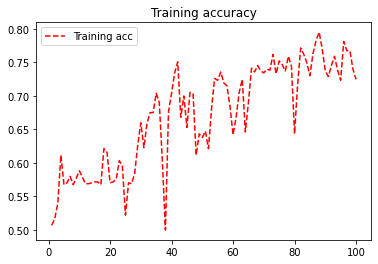

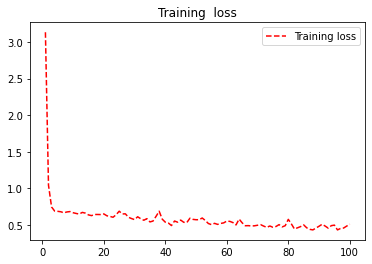

In [ ]:
plot_accuracy_and_loss(vgg_history)

In [ ]:
test_loss, test_acc = vgg.evaluate(X_test_original,  y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 7s 628ms/step - loss: 0.6025 - binary_accuracy: 0.7200
Accuracy: 0.7200000286102295
Loss:  0.6024994850158691


In [ ]:
test_loss, test_acc = vgg.evaluate(X_test_all, y_test_cat_all)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

7/7 [==============================] - 4s 525ms/step - loss: 0.6339 - binary_accuracy: 0.6800
Accuracy: 0.6800000071525574
Loss:  0.6338610053062439


Part 2 - DenseNet 169 

In [ ]:
dense169_model = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model.trainable=False 

y = dense169_model.layers[-1].output
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dropout(0.5)(y)
y = tf.keras.layers.Dense(1000, activation='relu')(y)
y = tf.keras.layers.Dropout(0.5)(y)
densenet_1_output = tf.keras.layers.Dense(2, activation='softmax')(y)

densenet_1 = tf.keras.models.Model(dense169_model.input, densenet_1_output)
densenet_1._name='densenet_1'
densenet_1.summary()

51888128/51877672 [==============================] - 2s 0us/step
Model: "densenet_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                        

In [ ]:
model_checkpoint_path = path + '/models/test2/densenet-output2'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='loss',
                                                    mode='min',
                                                    save_best_only=False,
                                                    save_freq=230)

In [ ]:
densenet_1.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_1_history = densenet_1.fit(X_train, Y_train_cat,
                    epochs=100,
                    batch_size=16,
                    callbacks =[model_checkpoint_callback])

# densenet_1.save(model_checkpoint_path)

Epoch 1/100
46/46 [==============================] - 25s 208ms/step - loss: 11.2089 - binary_accuracy: 0.5909
Epoch 2/100
46/46 [==============================] - 8s 169ms/step - loss: 1.0119 - binary_accuracy: 0.7727
Epoch 3/100
46/46 [==============================] - 8s 167ms/step - loss: 0.4118 - binary_accuracy: 0.8251
Epoch 4/100
46/46 [==============================] - 8s 167ms/step - loss: 0.2756 - binary_accuracy: 0.8912
Epoch 5/100
46/46 [==============================] - 8s 166ms/step - loss: 0.2486 - binary_accuracy: 0.9022
Epoch 6/100
46/46 [==============================] - 8s 167ms/step - loss: 0.2807 - binary_accuracy: 0.8857
Epoch 7/100
46/46 [==============================] - 8s 167ms/step - loss: 0.1840 - binary_accuracy: 0.9256
Epoch 8/100
46/46 [==============================] - 8s 167ms/step - loss: 0.1805 - binary_accuracy: 0.9284
Epoch 9/100
46/46 [==============================] - 8s 167ms/step - loss: 0.1800 - binary_accuracy: 0.9270
Epoch 10/100
46/46 [======

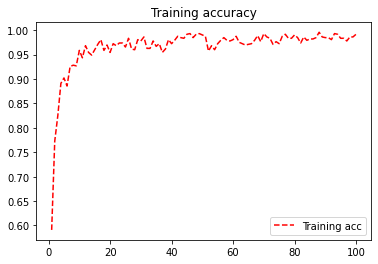

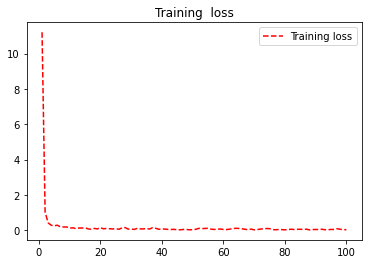

In [ ]:
plot_accuracy_and_loss(densenet_1_history)

In [ ]:
test_loss, test_acc = densenet_1.evaluate(X_test_original,  y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 8s 770ms/step - loss: 2.0013 - binary_accuracy: 0.6700
Accuracy: 0.6700000166893005
Loss:  2.0013420581817627


In [ ]:
test_loss, test_acc = densenet_1.evaluate(X_test_all, y_test_cat_all)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

7/7 [==============================] - 4s 560ms/step - loss: 2.0707 - binary_accuracy: 0.6650
Accuracy: 0.6650000214576721
Loss:  2.070671796798706


Part 3 - Densenet 169

In [ ]:
dense169_model2 = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model2.trainable=False 
# since the model is already loaded we load in again
z = dense169_model2.layers[-1].output
z = tf.keras.layers.Flatten()(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(1000, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(500, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(200, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
densenet_2_output = tf.keras.layers.Dense(2, activation='softmax')(z)

densenet_2 = tf.keras.models.Model(dense169_model2.input, densenet_2_output)
densenet_2._name='densenet_2'
densenet_2.summary()

Model: "densenet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                        

In [ ]:
model_checkpoint_path = path + '/models/test2/densenet-output3'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
densenet_2.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_2_history = densenet_2.fit(X_train, Y_train_cat,
                    epochs=100,
                    batch_size = 16)

densenet_2.save(model_checkpoint_path)


Epoch 1/100
46/46 [==============================] - 22s 171ms/step - loss: 9.3760 - binary_accuracy: 0.5069
Epoch 2/100
46/46 [==============================] - 8s 170ms/step - loss: 2.6059 - binary_accuracy: 0.5661
Epoch 3/100
46/46 [==============================] - 8s 170ms/step - loss: 1.2107 - binary_accuracy: 0.6185
Epoch 4/100
46/46 [==============================] - 8s 170ms/step - loss: 0.7173 - binary_accuracy: 0.6391
Epoch 5/100
46/46 [==============================] - 8s 171ms/step - loss: 0.6816 - binary_accuracy: 0.6680
Epoch 6/100
46/46 [==============================] - 8s 172ms/step - loss: 0.6368 - binary_accuracy: 0.6804
Epoch 7/100
46/46 [==============================] - 8s 173ms/step - loss: 0.5413 - binary_accuracy: 0.7342
Epoch 8/100
46/46 [==============================] - 8s 171ms/step - loss: 0.4840 - binary_accuracy: 0.7796
Epoch 9/100
46/46 [==============================] - 8s 171ms/step - loss: 0.4543 - binary_accuracy: 0.7961
Epoch 10/100
46/46 [=======

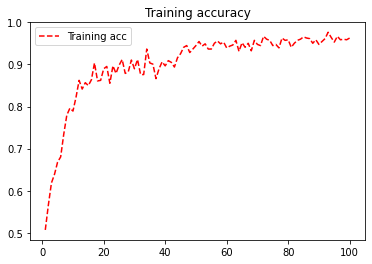

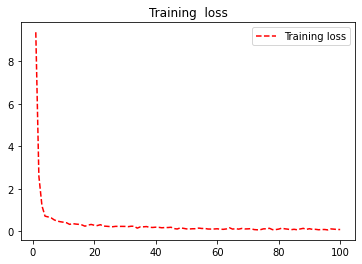

In [ ]:
plot_accuracy_and_loss(densenet_2_history)

In [ ]:
test_loss, test_acc = densenet_2.evaluate(X_test_original, y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 4s 223ms/step - loss: 1.2658 - binary_accuracy: 0.7000
Accuracy: 0.699999988079071
Loss:  1.2657585144042969


In [ ]:
test_loss, test_acc = densenet_2.evaluate(X_test_all, y_test_cat_all)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

7/7 [==============================] - 2s 244ms/step - loss: 1.3220 - binary_accuracy: 0.7000
Accuracy: 0.699999988079071
Loss:  1.3219925165176392


Ensembling all the models

In [ ]:
# vgg = tf.keras.models.load_model(path+'/models/test1/vgg')
# densenet_1 = tf.keras.models.load_model(path+'/models/test1/densenet-output2')
# densenet_2 = tf.keras.models.load_model(path+'/models/test1/densenet-1000-500-200')

In [ ]:
labels = tf.concat([y_train_enc, y_train_enc, y_train_enc], 0)
print(labels.shape)

(726,)


In [ ]:
vgg.trainable = False
densenet_1.trainable = False
densenet_2.trainable = False
models = [vgg, densenet_1, densenet_2]
# to avoid conflicts with naming
for layer in models[0].layers:
    layer._name = layer.name + str('_0')
for layer in models[1].layers:
    layer._name = layer.name + str('_1')
for layer in models[2].layers:
    layer._name = layer.name + str('_2')

In [ ]:
# ensemble = tf.keras.models.load_model(path + "/models/test5/ensemble")

In [ ]:
average = tf.keras.layers.Average()([vgg.output, densenet_1.output, densenet_2.output])
dense = tf.keras.layers.Dense(1, activation='sigmoid')(average)

ensemble = tf.keras.Model([vgg.input, densenet_1.input, densenet_2.input], dense)

In [ ]:
ensemble.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3_2 (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2_2 (ZeroPaddin  (None, 230, 230, 3)  0          ['input_3_2[0][0]']              
 g2D)                                                                                             
                                                                                                  
 conv1/conv_2 (Conv2D)          (None, 112, 112, 64  9408        ['zero_padding2d_2_2[0][0]']     
                                )                                                           

In [ ]:
# from keras.utils.vis_utils import plot_model

In [ ]:
# plot_model(ensembled, to_file = 'new_model.png', dpi=50)

In [ ]:
ensemble.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
model_checkpoint_path = path + '/models/test1/ensemble'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
ensemble_history = ensemble.fit([X_train, X_train, X_train],labels,
                                epochs=100,
                                batch_size = 16)
ensemble.save(path + '/models/test1/ensemble')

Epoch 1/100
46/46 [==============================] - 61s 489ms/step - loss: 0.9753 - binary_accuracy: 0.0510
Epoch 2/100
46/46 [==============================] - 20s 439ms/step - loss: 0.9506 - binary_accuracy: 0.0565
Epoch 3/100
46/46 [==============================] - 20s 440ms/step - loss: 0.9248 - binary_accuracy: 0.0551
Epoch 4/100
46/46 [==============================] - 20s 442ms/step - loss: 0.9032 - binary_accuracy: 0.0441
Epoch 5/100
46/46 [==============================] - 20s 442ms/step - loss: 0.8815 - binary_accuracy: 0.0386
Epoch 6/100
46/46 [==============================] - 20s 443ms/step - loss: 0.8628 - binary_accuracy: 0.0275
Epoch 7/100
46/46 [==============================] - 20s 441ms/step - loss: 0.8380 - binary_accuracy: 0.0234
Epoch 8/100
46/46 [==============================] - 20s 442ms/step - loss: 0.8217 - binary_accuracy: 0.0152
Epoch 9/100
46/46 [==============================] - 20s 442ms/step - loss: 0.8002 - binary_accuracy: 0.0165
Epoch 10/100
46/46 

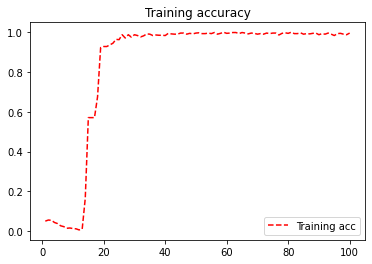

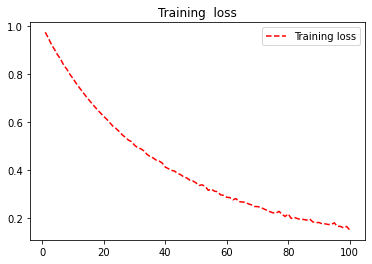

In [ ]:
plot_accuracy_and_loss(ensemble_history)

In [ ]:
test_loss, test_acc = ensemble.evaluate([X_test_original, X_test_original, X_test_original],  y_test_enc)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 21s 1s/step - loss: 0.6691 - binary_accuracy: 0.6900
Accuracy: 0.6899999976158142
Loss:  0.6691281795501709


In [ ]:
test_loss, test_acc = ensemble.evaluate([X_test_original, X_test_original, X_test_original],  y_test_enc)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 3s 611ms/step - loss: 0.6691 - binary_accuracy: 0.6900
Accuracy: 0.6899999976158142
Loss:  0.6691281795501709


Load ensemble model for further evaluation of performance matrix

INFO:tensorflow:Assets written to: /content/drive/MyDrive/COVID-19_Radiography_Dataset/models/test1/ensemble/assets


In [ ]:
ensemble = tf.keras.models.load_model(path + "/models/test1/ensemble")

OSError: ignored

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(ensemble, to_file = path + '/models/test1/ensemble.png', dpi=50)

In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])

In [ ]:
num = 50
print(type(y_pred))
print(y_pred[num-10:num])
print(y_test_enc[num])
y_test_enc = np.array(y_test_enc)
print(type(y_test_enc))

<class 'numpy.ndarray'>
[[0.05788653]
 [0.05824605]
 [0.6620409 ]
 [0.24177648]
 [0.87560236]
 [0.17809078]
 [0.8756435 ]
 [0.0579011 ]
 [0.69221216]
 [0.05803727]]
tf.Tensor(1, shape=(), dtype=int64)
<class 'numpy.ndarray'>


In [ ]:
y_pred[y_pred > 0.3] = 1.0
y_pred[y_pred <= 0.3] = 0.0

In [ ]:
print(y_pred.shape)

(100, 1)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

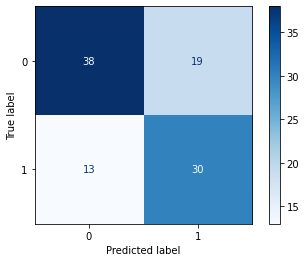

In [ ]:
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score

In [ ]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result

In [ ]:
binary_classification_performance(y_test_enc, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.68,0.61,0.7,0.65,0.68,0.61,0.7,38,30,19,13


In [ ]:
result3 = binary_classification_performance(y_test_enc, y_pred)

In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.1] = 1.0
y_pred[y_pred <= 0.1] = 0.0
print("threshold - 0.1")
result1 = binary_classification_performance(y_test_enc, y_pred)
display(result1)

threshold - 0.1


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.68,0.58,0.88,0.7,0.71,0.58,0.88,30,38,27,5


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.2] = 1.0
y_pred[y_pred <= 0.2] = 0.0
print("threshold - 0.2")
result2 = binary_classification_performance(y_test_enc, y_pred)
display(result2)

threshold - 0.2


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.71,0.63,0.77,0.69,0.72,0.63,0.77,38,33,19,10


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.4] = 1.0
y_pred[y_pred <= 0.4] = 0.0
print("threshold - 0.4")
result4 = binary_classification_performance(y_test_enc, y_pred)
display(result4)

threshold - 0.4


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.69,0.62,0.7,0.66,0.69,0.62,0.7,39,30,18,13


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.5] = 1.0
y_pred[y_pred <= 0.5] = 0.0
print("threshold - 0.5")
result5 = binary_classification_performance(y_test_enc, y_pred)
display(result5)

threshold - 0.5


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.69,0.64,0.65,0.64,0.69,0.64,0.65,41,28,16,15


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.6] = 1.0
y_pred[y_pred <= 0.6] = 0.0
print("threshold - 0.6")
result6 = binary_classification_performance(y_test_enc, y_pred)
display(result6)

threshold - 0.6


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.68,0.63,0.6,0.61,0.67,0.63,0.6,42,26,15,17


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.7] = 1.0
y_pred[y_pred <= 0.7] = 0.0
print("threshold - 0.7")
result7 = binary_classification_performance(y_test_enc, y_pred)
display(result7)

threshold - 0.7


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.69,0.67,0.56,0.61,0.67,0.67,0.56,45,24,12,19


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.8] = 1.0
y_pred[y_pred <= 0.8] = 0.0
print("threshold - 0.8")
result8 = binary_classification_performance(y_test_enc, y_pred)
display(result8)

threshold - 0.8


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.69,0.69,0.51,0.59,0.67,0.69,0.51,47,22,10,21


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.9] = 1.0
y_pred[y_pred <= 0.9] = 0.0
print("threshold - 0.9")
result9 = binary_classification_performance(y_test_enc, y_pred)
display(result9)

threshold - 0.9


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.57,0.0,0.0,NaN,0.5,NaN,0.0,57,0,0,43


In [ ]:
results = [result1, result2, result3, result4, result5, result6, result7, result8, result9 ]

In [ ]:
accuracies = [i['Accuracy'] for i in results ]
recalls = [i['Recall (senitivity or TPR)'] for i in results ]
precisions = [i['Precision (or PPV)'] for i in results ]
f1s = [i['f1 score'] for i in results ]

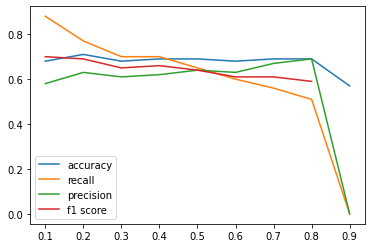

In [ ]:
X = np.linspace(0.1, 0.9, 9)
plt.plot(X, accuracies, label="accuracy")
plt.plot(X, recalls, label='recall')
plt.plot(X, precisions, label='precision')
plt.plot(X, f1s, label='f1 score')
plt.legend()
plt.show()

In [ ]:
results = pd.concat(results)

In [ ]:
results.insert(0, "Threshold", X, True)

In [ ]:
results = results.reset_index(drop=True)

In [ ]:
pd.set_option('precision', 3)

In [ ]:
results.style.highlight_max(color = 'black')
# your_df.style.highlight_max(color = 'green')

,Threshold,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.100,0.680,0.580,0.880,0.700,0.710,0.580,0.880,30,38,27,5
1,0.200,0.710,0.630,0.770,0.690,0.720,0.630,0.770,38,33,19,10
2,0.300,0.680,0.610,0.700,0.650,0.680,0.610,0.700,38,30,19,13
3,0.400,0.690,0.620,0.700,0.660,0.690,0.620,0.700,39,30,18,13
4,0.500,0.690,0.640,0.650,0.640,0.690,0.640,0.650,41,28,16,15
5,0.600,0.680,0.630,0.600,0.610,0.670,0.630,0.600,42,26,15,17
6,0.700,0.690,0.670,0.560,0.610,0.670,0.670,0.560,45,24,12,19
7,0.800,0.690,0.690,0.510,0.590,0.670,0.690,0.510,47,22,10,21
8,0.900,0.570,0.000,0.000,nan,0.500,nan,0.000,57,0,0,43
